In [63]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [64]:
temp = pd.read_csv(r"../data/Temp.csv")
sea = pd.read_csv(r"../data/Sea.csv")

joint = pd.merge(temp, sea, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,Temp,Sea
0,1880,-0.315832,-180.236283
1,1881,-0.232246,-173.039065
2,1882,-0.295530,-191.580733
3,1883,-0.346474,-190.455727
4,1884,-0.492320,-166.597397
...,...,...,...
136,2016,0.932927,56.330711
137,2017,0.845174,55.112391
138,2018,0.762654,52.083272
139,2019,0.891073,60.980739


In [65]:
temp_array = joint["Temp"].to_numpy().reshape(-1, 1)
sea_array = joint["Sea"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_4 = regr.fit(temp_array, sea_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(temp_array, sea_array)}.")


The model [ y = 168.6470159654764 x + -76.12408635273532] has score 0.851583247984832.


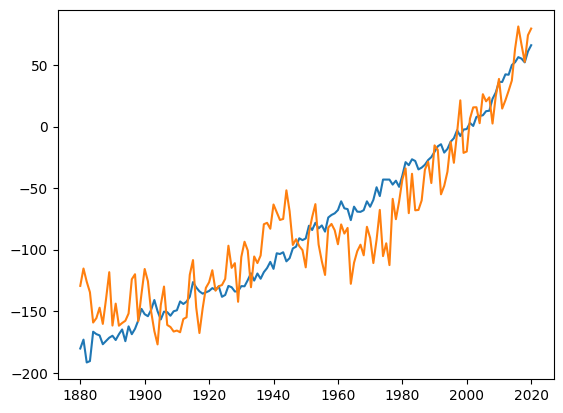

In [70]:
def temp_to_sea(array):
    predict_array = model_4.predict(array)

    return predict_array

# inspect the fit in historical data
sea_predict = temp_to_sea(joint["Temp"].to_numpy().reshape(-1, 1))
plt.plot(np.asarray(joint["Year"], float), joint["Sea"])
plt.plot(np.asarray(joint["Year"], float), sea_predict)
plt.show()